In [1]:
import pandas as pd
import numpy as np
import torch
from torch import Tensor
import seaborn as sns
from matplotlib import pyplot as plt

### Torch logistic function

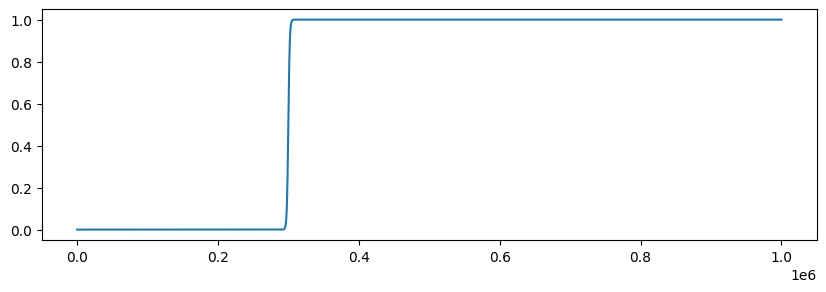

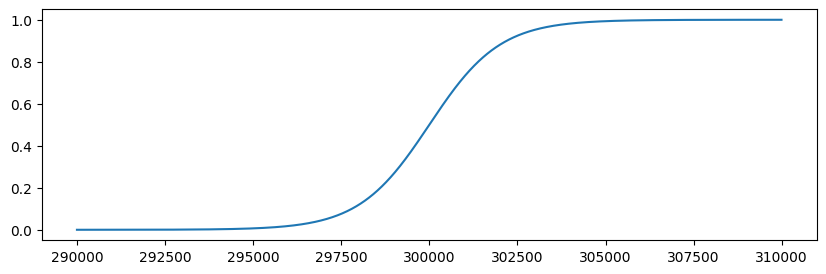

In [2]:
def logistic_tensor(x_0: float, k: float, start: float, end: float, steps: int = 100000) -> (Tensor, Tensor):
    """Generates a logistic function tensor.
    x_0: The x-value of the sigmoid's midpoint.
    k: The logistic growth rate.
    start: The start of the range.
    end: The end of the range.
    steps: The number of steps in the range.
    """
    linspace = torch.linspace(start, end, steps)

    logistic = 1 / (1 + torch.exp(-k *(linspace - x_0) ))
    return linspace, logistic

linspace, logistic = logistic_tensor(3e5, 1e-3, 0, 1e6)




plt.figure(figsize=(10, 3))
sns.lineplot(x=linspace.numpy(), y=logistic.numpy());
plt.figure(figsize=(10, 3))

mask = (linspace > 2.9e5) & (linspace < 3.1e5)
sns.lineplot(x=linspace[mask].numpy(), y=logistic[mask].numpy());

# Binary search simulation

['stable_low', 'stable_low', 'boundary', 'boundary', 'stable_high', 'stable_high', 'stable_high', 'stable_high', 'stable_high', 'stable_high']
(0, ['initial', 0, 99999])
(1, [['stable_low', 0, 9999], ['stable_low', 10000, 19999], ['boundary', 20000, 29999], ['boundary', 30000, 39999], ['stable_high', 40000, 49999], ['stable_high', 50000, 59999], ['stable_high', 60000, 69999], ['stable_high', 70000, 79999], ['stable_high', 80000, 89999], ['stable_high', 90000, 99999]])


<Axes: >

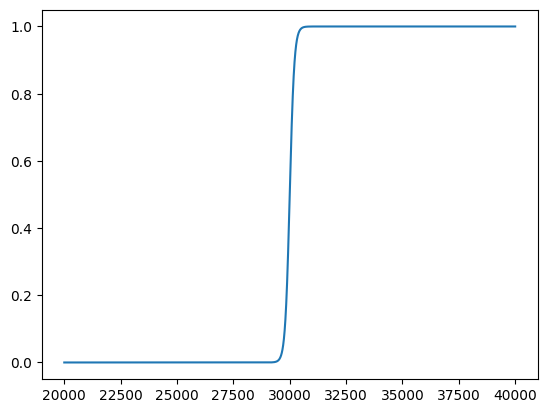

In [44]:
import pandas as pd


class nary_search():
    """
    Performs an n-ary search on the given data and returns appropriate indexes
    """
    def __init__(self, n: int = 2, bounds: float = (0.1, 0.90)) -> float:
        self.n = n
        self.bounds = bounds
        self.history = dict()
    
    def preprocess_data(self, data):

        data = pd.Series(data)
        self.history[0]=['initial', data.index[0], data.index[-1]]


        return (data - data.min()) / (data.max() - data.min())

    def split_data(self, data):
        """
        Split a NumPy array into exactly `self.n` contiguous parts, preserving the original index
        """

        sizes = [(int(len(data)/self.n)) + (1 if i<len(data)%self.n else 0) for i in range(self.n)]
        start = 0
        splits = list()
        for size in sizes:
            splits.append(data[start:start+size])
            start+=size
        return splits 
    
    
    def check_region(self, data):
   
        min_bound, max_bound = data.min(), data.max()
        
        if min_bound > self.bounds[0] and max_bound < self.bounds[1]:
            return "target_match"
        elif min_bound < self.bounds[0] and max_bound > self.bounds[1]:
            return "inflection"

        elif max_bound < self.bounds[0]:
            return "stable_low"
        elif min_bound > self.bounds[1]:
            return "stable_high"
        
        
        
        return "boundary"
    
    def check_regions(self, regions):
        region_conclusions = [self.check_region(region) for region in regions]
        return region_conclusions
    

    def add_history(self, regions:list[pd.Series], reg_types:list[str]):
        res =[]
        for reg, typ in zip(regions, reg_types):
            res.append([typ, reg.index[0], reg.index[-1]])
        self.history[max(self.history.keys())+1] = res

    def run_search(self, data):
        data = self.preprocess_data(data)
        iteration = 0
        
        
        while True:
            regions = self.split_data(data)
            region_types = self.check_regions(regions)
            self.add_history(regions,region_types)
            
            print(region_types)
            if "target_match" in region_types or "inflection" not in region_types:
                #return regions[region_results.index("target_match")]
                target_reg = [regions[i] for i, reg in enumerate(region_types) if reg in ['boundary', 'target_match']]
                return pd.concat(target_reg)
                
            data = regions[region_types.index("inflection")]

        


binary = nary_search(n=10, bounds=(0.1, 0.9))
d = np.arange(0,100, 1)
res = binary.run_search(logistic)
for item in binary.history.items():
    print(item)

sns.lineplot(res)